In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data('tips')
print(df.head(3), '\n')
print(df.info())

   total_bill   tip     sex smoker  day    time  size
1       16.99  1.01  Female     No  Sun  Dinner     2
2       10.34  1.66    Male     No  Sun  Dinner     3
3       21.01  3.50    Male     No  Sun  Dinner     3 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB
None


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

<code>from sklearn.linear_model import LinearRegression</code>

<code># assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)</code>

Modify and add to the code above as necessary for it to work with the tips dataset.

In [3]:
model = LinearRegression()
model.fit(df[['total_bill']], df.tip)
df['predictions'] = model.predict(df[['total_bill']])

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,predictions
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835


## 3. Plot the residuals for the linear regression model that you made.

In [4]:
df['residual'] = df.tip - df.predictions
df['baseline_residual'] = df.tip - df.tip.mean() 

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,predictions,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165,0.501721


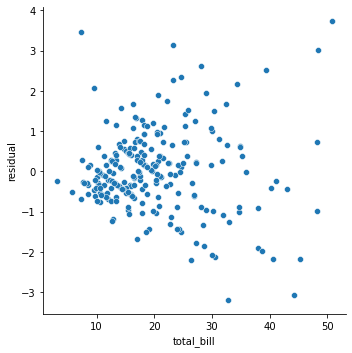

In [5]:
sns.relplot(df['total_bill'], df['residual'], kind='scatter')

## 4. For the model, calculate:
- the sum of squared errors, 
- explained sum of squares,
- total sum of squares, 
- mean squared error, and 
- root mean squared error

In [6]:
sse = mean_squared_error(df.tip, df.predictions) * len(df)
ess = sum((df.predictions - df.tip.mean())**2)
tss = ess + sse
mse = mean_squared_error(df.tip, df.predictions)
rmse = mse ** 0.5

In [7]:
print('the sum of squared errors:', round(sse, 2))
print('explained sum of squares:', round(ess, 2))
print('total sum of squares:', round(tss, 2))
print('mean squared error:', round(mse, 2))
print('root mean squared error:', round(rmse, 2))

the sum of squared errors: 252.79
explained sum of squares: 212.42
total sum of squares: 465.21
mean squared error: 1.04
root mean squared error: 1.02


## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [8]:
df['baseline'] = df.tip.mean()
sse_baseline = mean_squared_error(df.tip, df.baseline) * len(df)
ess_baseline = sum((df.baseline - df.tip.mean())**2)
tss_baseline = ess + sse
mse_baseline = mean_squared_error(df.tip, df.baseline)
rmse_baseline = mse ** 0.5

In [9]:
print('the sum of squared errors, baseline:', round(sse_baseline, 2))
print('explained sum of squares, baseline:', round(ess_baseline, 2))
print('total sum of squares, baseline:', round(tss_baseline, 2))
print('mean squared error, baseline:', round(mse_baseline, 2))
print('root mean squared error, baseline:', round(rmse_baseline, 2))

the sum of squared errors, baseline: 465.21
explained sum of squares, baseline: 0.0
total sum of squares, baseline: 465.21
mean squared error, baseline: 1.91
root mean squared error, baseline: 1.02


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [10]:
sse < sse_baseline

True

## 7. What is the amount of variance explained in your model?

In [11]:
round(ess / tss, 2)

0.46

## 8. Is your model better than the baseline model?

In [12]:
(ess / tss) > (ess_baseline / tss_baseline)

True

## 9. Create a file named evaluate.py that contains the following functions.
    * plot_residuals(y, yhat): creates a residual plot
    - regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

## 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.